Before any analysis. Both the R kernal and Stata kernal need to be properly setup. First start with R. We first need to install the correct Python to R package using pip. 

In [2]:
pip install rpy2


Note: you may need to restart the kernel to use updated packages.


After we have done this we then need to setup R within the Python kernal

In [4]:
%load_ext rpy2.ipython


Finally a quick little test to make sure R now works. Anytime we want R code to run we have to use the magic cells %%R.

In [6]:
%%R
x <- c(1,2,3,4,5)
mean(x)

[1] 3


Now we have to install the python to stata dependecies to get Stata to work in a Python kernal. We start by installing the pystata package.

In [8]:
pip install pystata

Note: you may need to restart the kernel to use updated packages.


We then also install the stata_setup package.

In [10]:
pip install --upgrade --user stata_setup

Note: you may need to restart the kernel to use updated packages.


We now import that stata_setup package into the python kernal.

In [12]:
import stata_setup

And finally we import Stata itself into the kernal.

In [14]:
stata_setup.config("/Applications/Stata", "se")



  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      18.0
___/   /   /___/   /   /___/       SE—Standard Edition

 Statistics and Data Science       Copyright 1985-2023 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Unlimited-user network, expiring 14 Sep 2025
Serial number: 401809305318
  Licensed to: Scott oatley
               University of Edinburgh

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. Maximum number of variables is set to 5,000 but can be increased;
          see help set_maxvar.


And we now test that Stata works by doing a simple test using display.

In [16]:
%%stata

display 1+1


. 
. display 1+1
2

. 


And now back to R to make sure they both can run at the same time.

In [18]:
%%R
y <- c(1,2,3,NA)
is.na(y) # returns a vector (F F F T)

[1] FALSE FALSE FALSE  TRUE


Each handling missing data method will now be explored using the four aforementioned software programs: R, Stata, Python, and Mplus. Some methods are not possible with certain software, when this happens, only relevant software will be mentioned. We start with a simple simulation of an OLS linear regression model with three continuous independent variables that are normally distributed with means ranging from 40-200 and standard deviations ranging from 5-50. First we start with R, then Stata, then Python, and finally Mplus.

All methods will be produced.

In [20]:
%%R

# Load necessary library
set.seed(123)  # Ensure reproducibility

# Generate metric independent variables
x1 <- rnorm(1000, mean = 40, sd = 12)
x2 <- rnorm(1000, mean = 200, sd = 50)
x3 <- rnorm(1000, mean = 150, sd = 5)

# Generate metric dependent variable
y <- 30*x1 + 40*x2 + 50*x3 + rnorm(1000, mean = 5000, sd = 1500)

# Create data frame
data <- data.frame(y, x1, x2, x3)

# Run regression
model <- lm(y ~ x1 + x2 + x3, data = data)
summary(model)



Call:
lm(formula = y ~ x1 + x2 + x3, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4584.3  -950.2     0.7  1012.9  4338.4 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2726.9512  1462.4421   1.865   0.0625 .  
x1            29.8375     3.9740   7.508 1.33e-13 ***
x2            39.7564     0.9369  42.432  < 2e-16 ***
x3            65.4442     9.6348   6.792 1.89e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1489 on 996 degrees of freedom
Multiple R-squared:  0.6662,	Adjusted R-squared:  0.6652 
F-statistic: 662.5 on 3 and 996 DF,  p-value: < 2.2e-16



This is the same as this in Stata:


. 
. * Set seed
. set seed 123

. 
. * Set number of observations
. set obs 1000
Number of observations (_N) was 0, now 1,000.

. 
. * Generate metric independent variable #1
. drawnorm x1, n(1000) means(40) sds(12)

. 
. * Generate metric independent variable #2
. drawnorm x2, n(1000) means(200) sds(50)

. 
. * Generate metric independent variable #3
. drawnorm x3, n(1000) means(150) sds(5)

. 
. * Generate metric dependent variable with large coefficients
. gen y = 30*x1 + 40*x2 + 50*x3 + rnormal(5000, 1500)

. 
. * Run Model
. regress y x1 x2 x3

      Source |       SS           df       MS      Number of obs   =     1,000
-------------+----------------------------------   F(3, 996)       =    714.04
       Model |  4.7321e+09         3  1.5774e+09   Prob > F        =    0.0000
    Residual |  2.2002e+09       996  2209043.89   R-squared       =    0.6826
-------------+----------------------------------   Adj R-squared   =    0.6817
       Total |  6.9323e+09       999  6939202.43

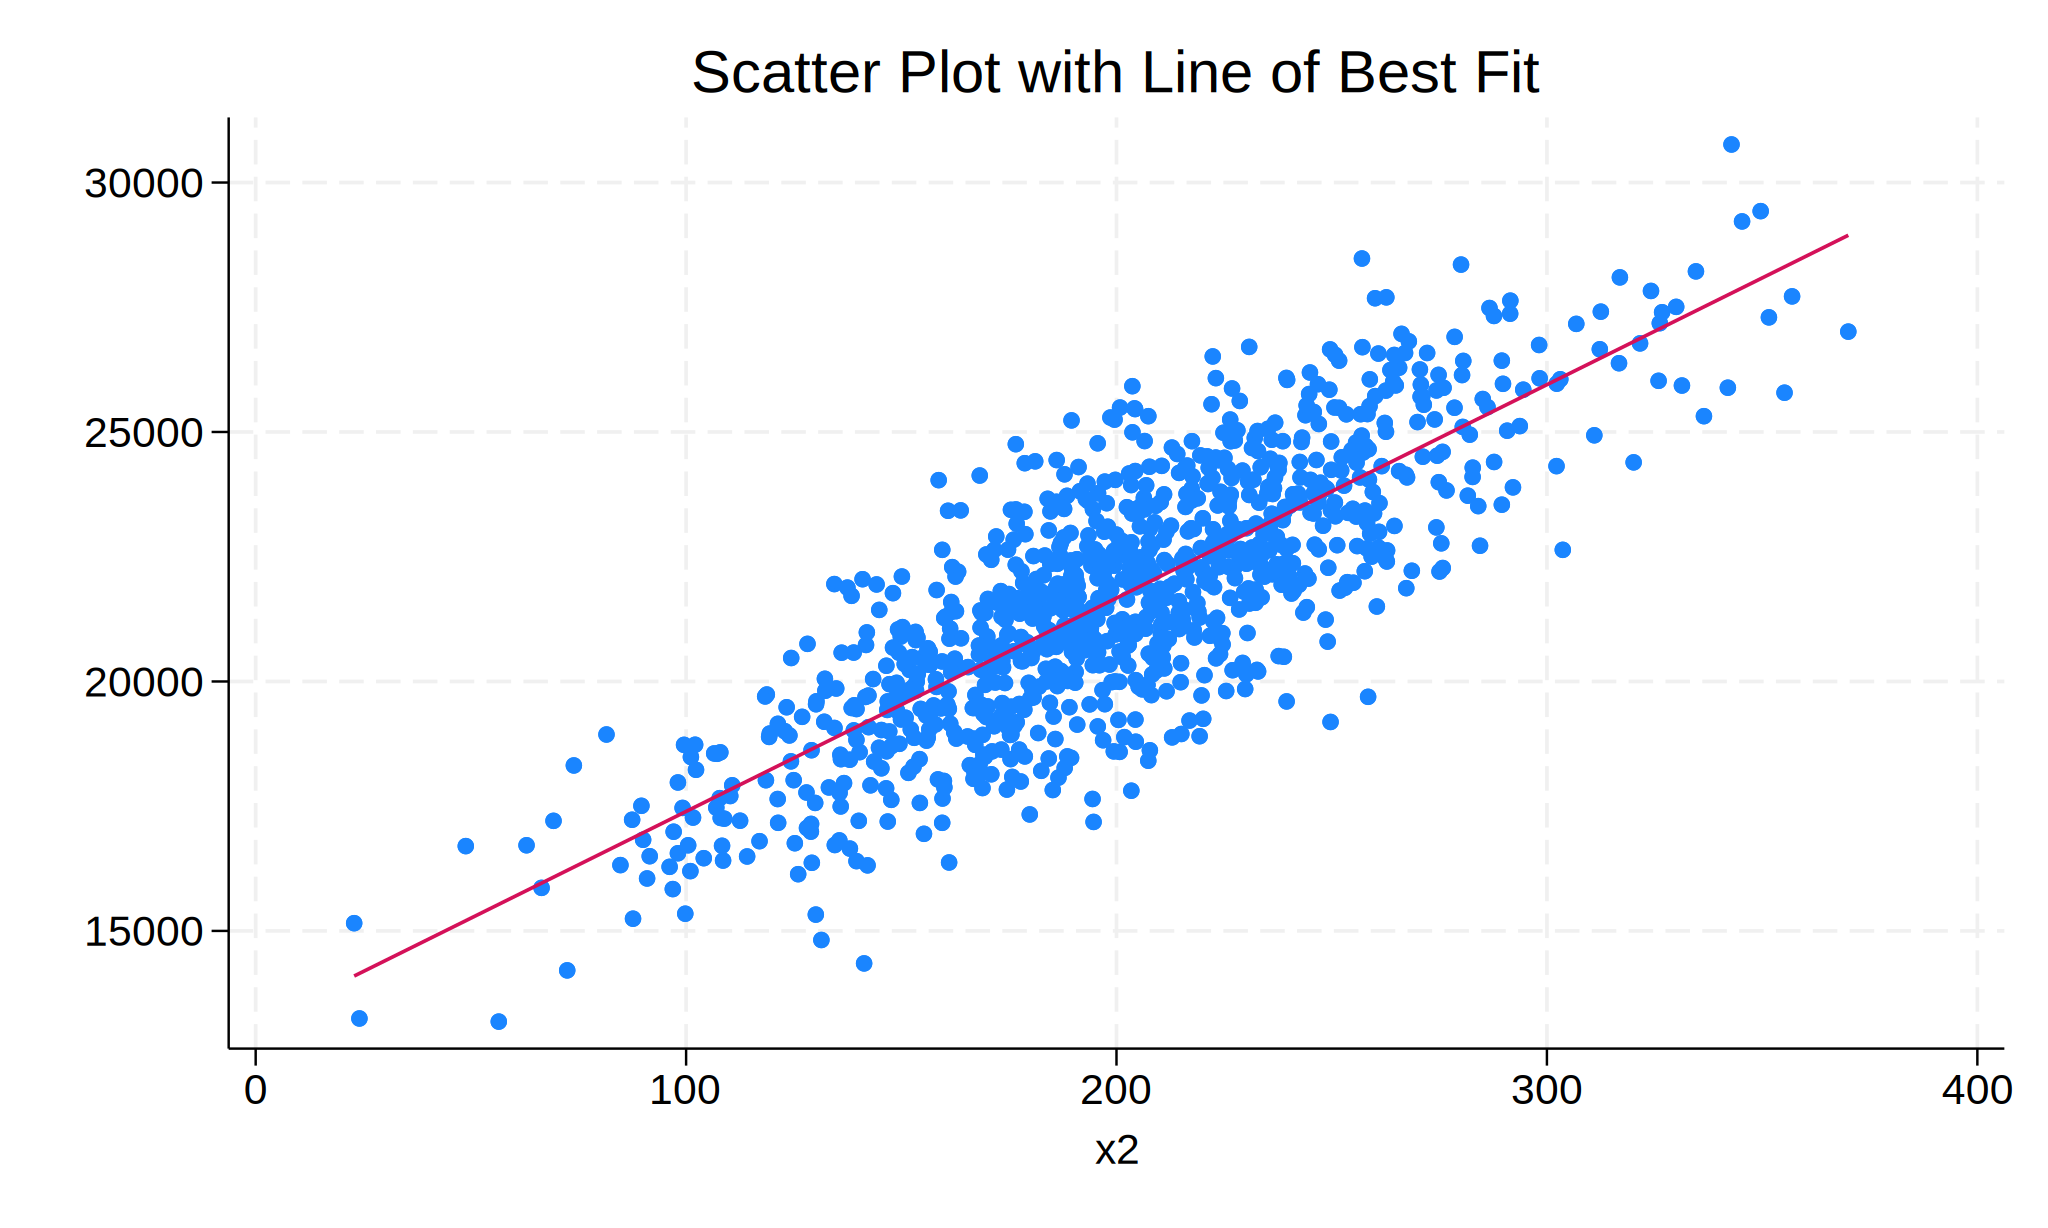

In [22]:
%%stata

* Set seed
set seed 123

* Set number of observations
set obs 1000

* Generate metric independent variable #1
drawnorm x1, n(1000) means(40) sds(12)

* Generate metric independent variable #2
drawnorm x2, n(1000) means(200) sds(50)

* Generate metric independent variable #3
drawnorm x3, n(1000) means(150) sds(5)

* Generate metric dependent variable with large coefficients
gen y = 30*x1 + 40*x2 + 50*x3 + rnormal(5000, 1500)

* Run Model
regress y x1 x2 x3

etable

twoway (scatter y x2) (lfit y x2), title("Scatter Plot with Line of Best Fit") legend(off)

Now don't worry too much that the results from the models aren't exactly perfect. That is because we have different seeds for each software. Substantively they are the same and that is all that matters here. Now for Python.

In [24]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Set seed for reproducibility
np.random.seed(123)

# Generate metric independent variables
x1 = np.random.normal(loc=40, scale=12, size=1000)
x2 = np.random.normal(loc=200, scale=50, size=1000)
x3 = np.random.normal(loc=150, scale=5, size=1000)

# Generate metric dependent variable
y = 30*x1 + 40*x2 + 50*x3 + np.random.normal(loc=5000, scale=1500, size=1000)

# Create DataFrame
df = pd.DataFrame({'y': y, 'x1': x1, 'x2': x2, 'x3': x3})

# Run regression
X = df[['x1', 'x2', 'x3']]  # Independent variables
X = sm.add_constant(X)  # Add intercept
model = sm.OLS(df['y'], X).fit()  # Fit model

# Display summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     537.7
Date:                Sun, 06 Apr 2025   Prob (F-statistic):          1.03e-207
Time:                        13:35:34   Log-Likelihood:                -8719.9
No. Observations:                1000   AIC:                         1.745e+04
Df Residuals:                     996   BIC:                         1.747e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5257.2104   1467.373      3.583      0.0

And finally, as Mplus as written through R. Currently, no access to full MPlus licence which does cause some issues with getting MPlus to run properly. For now this is all the MPlus I can produce. 

In [26]:
%%R

install.packages("MplusAutomation")
install.packages("texreg")

--- Please select a CRAN mirror for use in this session ---
Secure CRAN mirrors 

 1: 0-Cloud [https]
 2: Australia (Canberra) [https]
 3: Australia (Melbourne 1) [https]
 4: Australia (Melbourne 2) [https]
 5: Austria (Wien 1) [https]
 6: Belgium (Brussels) [https]
 7: Brazil (PR) [https]
 8: Brazil (SP 1) [https]
 9: Brazil (SP 2) [https]
10: Bulgaria [https]
11: Canada (ON 1) [https]
12: Canada (ON 2) [https]
13: Chile (Santiago) [https]
14: China (Beijing 1) [https]
15: China (Beijing 2) [https]
16: China (Beijing 3) [https]
17: China (Hefei) [https]
18: China (Hong Kong) [https]
19: China (Jinan) [https]
20: China (Lanzhou) [https]
21: China (Nanjing) [https]
22: China (Shanghai 2) [https]
23: China (Shenzhen) [https]
24: China (Wuhan) [https]
25: Colombia (Cali) [https]
26: Costa Rica [https]
27: Cyprus [https]
28: Czech Republic [https]
29: Denmark [https]
30: East Asia [https]
31: Ecuador (Cuenca) [https]
32: Finland (Helsinki) [https]
33: France (Lyon 1) [https]
34: France (Ly

Selection:  67



The downloaded binary packages are in
	/var/folders/5m/wtp81d3x2vx4v3kw6v37qj180000gn/T//RtmprBoE5j/downloaded_packages

The downloaded binary packages are in
	/var/folders/5m/wtp81d3x2vx4v3kw6v37qj180000gn/T//RtmprBoE5j/downloaded_packages


trying URL 'https://mirror.las.iastate.edu/CRAN/bin/macosx/big-sur-arm64/contrib/4.4/MplusAutomation_1.1.1.tgz'
Content type 'application/x-gzip' length 2769853 bytes (2.6 MB)
downloaded 2.6 MB

trying URL 'https://mirror.las.iastate.edu/CRAN/bin/macosx/big-sur-arm64/contrib/4.4/texreg_1.39.4.tgz'
Content type 'application/x-gzip' length 1340319 bytes (1.3 MB)
downloaded 1.3 MB

In addition: Warning message:
In doTryCatch(return(expr), name, parentenv, handler) :
  unable to load shared object '/Library/Frameworks/R.framework/Resources/modules//R_X11.so':
  dlopen(/Library/Frameworks/R.framework/Resources/modules//R_X11.so, 0x0006): Library not loaded: /opt/X11/lib/libSM.6.dylib
  Referenced from: <31EADEB5-0A17-3546-9944-9B3747071FE8> /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/modules/R_X11.so
  Reason: tried: '/opt/X11/lib/libSM.6.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/X11/lib/libSM.6.dylib' (no such file), '/opt/X11/lib/libSM.6.dylib' (no 

In [27]:
%%R

# Load necessary libraries
library(MplusAutomation)
library(texreg)

# Define the OLS linear regression model
olsModel <- mplusObject(
  TITLE = "OLS Linear Regression Model in Mplus;",
  MODEL = "
     mpg ON hp wt;",  # mpg as dependent variable, hp and wt as independent variables
  OUTPUT = "CINTERVAL;",  # Request confidence intervals for estimates
  rdata = mtcars  # Use the mtcars dataset
)

# Run the model
fit_ols <- mplusModeler(olsModel, modelout = "ols_model.inp", run = 1L)

# Display fit statistics
screenreg(fit_ols, summaries = c("Observations", "CFI", "SRMR"), single.row = TRUE)



                  TITLE           
----------------------------------
 MPG<-HP          -0.03 (0.01) ***
 MPG<-WT          -3.88 (0.60) ***
 MPG<-Intercepts  37.23 (1.52) ***
 MPG<->MPG         6.10 (1.52) ***
----------------------------------
Observations      32              
CFI                1.00           
SRMR               0.00           
*** p < 0.001; ** p < 0.01; * p < 0.05
 FALSE

Version:  1.1.1
We work hard to write this free software. Please help us get credit by citing: 

Hallquist, M. N. & Wiley, J. F. (2018). MplusAutomation: An R Package for Facilitating Large-Scale Latent Variable Analyses in Mplus. Structural Equation Modeling, 25, 621-638. doi: 10.1080/10705511.2017.1402334.

-- see citation("MplusAutomation").
Version:  1.39.4
Date:     2024-07-23
Author:   Philip Leifeld (University of Manchester)

Consider submitting praise using the praise or praise_interactive functions.
Please cite the JSS article in your publications -- see citation("texreg").


The simple OLS linear regression model has now been conducted. We now perform the same model under a sem framework. 

In [29]:
%%stata

clear

* Set seed
set seed 123

* Set number of observations
set obs 1000

* Generate metric independent variable #1
drawnorm x1, n(1000) means(40) sds(12)

* Generate metric independent variable #2
drawnorm x2, n(1000) means(200) sds(50)

* Generate metric independent variable #3
drawnorm x3, n(1000) means(150) sds(5)

* Generate metric dependent variable with large coefficients
gen y = 30*x1 + 40*x2 + 50*x3 + rnormal(5000, 1500)

sem (y <- x1 x2 x3), method(mlmv)

etable, append 


. 
. clear

. 
. * Set seed
. set seed 123

. 
. * Set number of observations
. set obs 1000
Number of observations (_N) was 0, now 1,000.

. 
. * Generate metric independent variable #1
. drawnorm x1, n(1000) means(40) sds(12)

. 
. * Generate metric independent variable #2
. drawnorm x2, n(1000) means(200) sds(50)

. 
. * Generate metric independent variable #3
. drawnorm x3, n(1000) means(150) sds(5)

. 
. * Generate metric dependent variable with large coefficients
. gen y = 30*x1 + 40*x2 + 50*x3 + rnormal(5000, 1500)

. 
. sem (y <- x1 x2 x3), method(mlmv)

Endogenous variables
  Observed: y

Exogenous variables
  Observed: x1 x2 x3

Fitting target model:
Iteration 0:  Log likelihood = -20967.462  
Iteration 1:  Log likelihood = -20967.462  

Structural equation model                                Number of obs = 1,000
Estimation method: mlmv

Log likelihood = -20967.462

------------------------------------------------------------------------------
             |               

In [30]:
%%R

# Load necessary libraries
library(lavaan)
library(MASS)  # For mvrnorm (multivariate normal distribution)

# Set seed for reproducibility
set.seed(123)

# Generate metric independent variables
x1 <- rnorm(1000, mean = 40, sd = 12)
x2 <- rnorm(1000, mean = 200, sd = 50)
x3 <- rnorm(1000, mean = 150, sd = 5)

# Generate metric dependent variable
y <- 30*x1 + 40*x2 + 50*x3 + rnorm(1000, mean = 5000, sd = 1500)

# Create a dataframe
data <- data.frame(y, x1, x2, x3)

# Define the SEM model
sem_model <- '
  y ~ x1 + x2 + x3
'

# Fit the model using Maximum Likelihood with Missing Values (MLMV)
fit <- sem(sem_model, data = data, missing = "ml")

# Print model summary
summary(fit, fit.measures = TRUE, standardized = TRUE)


lavaan 0.6-18 ended normally after 1 iteration

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                         5

  Number of observations                          1000
  Number of missing patterns                         1

Model Test User Model:
                                                      
  Test statistic                                 0.000
  Degrees of freedom                                 0

Model Test Baseline Model:

  Test statistic                              1097.097
  Degrees of freedom                                 3
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    1.000
  Tucker-Lewis Index (TLI)                       1.000
                                                      
  Robust Comparative Fit Index (CFI)             1.000
  Robust Tucker-Lewis Index (TLI)    

This is lavaan 0.6-18
lavaan is FREE software! Please report any bugs.
In addition: Warning messages:
1: lavaan->lav_data_full():  
   some observed variances are larger than 1000000 use varTable(fit) to 
   investigate 
2: lavaan->lavData():  
   some observed variances in the sample covariance matrix are larger than 
   1000000. 
3: lavaan->lavData():  
   some observed variances in the sample covariance matrix are larger than 
   1000000. 
4: lavaan->lavData():  
   some observed variances in the sample covariance matrix are larger than 
   1000000. 
5: lavaan->lavData():  
   some observed variances in the sample covariance matrix are larger than 
   1000000. 


In [31]:
pip install semopy


Note: you may need to restart the kernel to use updated packages.


In [32]:
import numpy as np
import pandas as pd
from semopy import Model

# Set random seed for reproducibility
np.random.seed(123)

# Generate metric independent variables
x1 = np.random.normal(loc=40, scale=12, size=1000)
x2 = np.random.normal(loc=200, scale=50, size=1000)
x3 = np.random.normal(loc=150, scale=5, size=1000)

# Generate metric dependent variable
y = 30*x1 + 40*x2 + 50*x3 + np.random.normal(loc=5000, scale=1500, size=1000)

# Create a DataFrame
data = pd.DataFrame({'y': y, 'x1': x1, 'x2': x2, 'x3': x3})

# Define the SEM model in semopy syntax
sem_model = """
y ~ x1 + x2 + x3
"""

# Create and fit the model
model = Model(sem_model)
model.fit(data)

# Print model results
print(model.inspect())


  lval  op rval      Estimate       Std. Err    z-value       p-value
0    y   ~   x1  2.826314e+01       4.470083   6.322734  2.569751e-10
1    y   ~   x2  3.870783e+01       1.120236  34.553275  0.000000e+00
2    y   ~   x3  9.507102e+00      10.935110   0.869411  3.846225e-01
3    y  ~~    y  2.875963e+06  128616.985180  22.360680  0.000000e+00


In [33]:
%%R

# Load necessary libraries
library(MplusAutomation)
library(texreg)

# Define the SEM model
semModel <- mplusObject(
  TITLE = "Structural Equation Model (SEM) in Mplus;",
  MODEL = "
     mpg ON hp wt;",  # Regression model in SEM form
  OUTPUT = "STANDARDIZED CINTERVAL;",  # Request standardized results and confidence intervals
  rdata = mtcars  # Use the mtcars dataset
)

# Run the SEM model in Mplus
fit_sem <- mplusModeler(
  semModel, 
  modelout = "sem_model.inp",  # Output .inp file
  run = 1L                     # Run the model after writing input
)

# Display model fit statistics
screenreg(fit_sem, summaries = c("Observations", "CFI", "SRMR"), single.row = TRUE)



                  TITLE           
----------------------------------
 MPG<-HP          -0.03 (0.01) ***
 MPG<-WT          -3.88 (0.60) ***
 MPG<-Intercepts  37.23 (1.52) ***
 MPG<->MPG         6.10 (1.52) ***
----------------------------------
Observations      32              
CFI                1.00           
SRMR               0.00           
*** p < 0.001; ** p < 0.01; * p < 0.05
 FALSE

Now we move on to a simple MCAR model. Starting with Stata.


. 
. clear

. 
. * Set seed
. set seed 123

. 
. * Set number of observations
. set obs 1000
Number of observations (_N) was 0, now 1,000.

. 
. * Generate metric independent variable #1
. drawnorm x1, n(1000) means(40) sds(12)

. 
. * Generate metric independent variable #2
. drawnorm x2, n(1000) means(200) sds(50)

. 
. * Generate metric independent variable #3
. drawnorm x3, n(1000) means(150) sds(5)

. 
. * Generate metric dependent variable with large coefficients
. gen y = 30*x1 + 40*x2 + 50*x3 + rnormal(5000, 1500)

. 
. * Generate MCAR 
. gen rmcar = rbinomial(1, 0.5)  // MCAR: 50% chance of missingness (binary ran
> dom)

. replace x2 = . if rmcar == 0  // Set x to missing where rmcar == 0
(492 real changes made, 492 to missing)

. 
. regress y x1 x2 x3

      Source |       SS           df       MS      Number of obs   =       508
-------------+----------------------------------   F(3, 504)       =    325.45
       Model |  2.3023e+09         3   767444127   Prob > F        

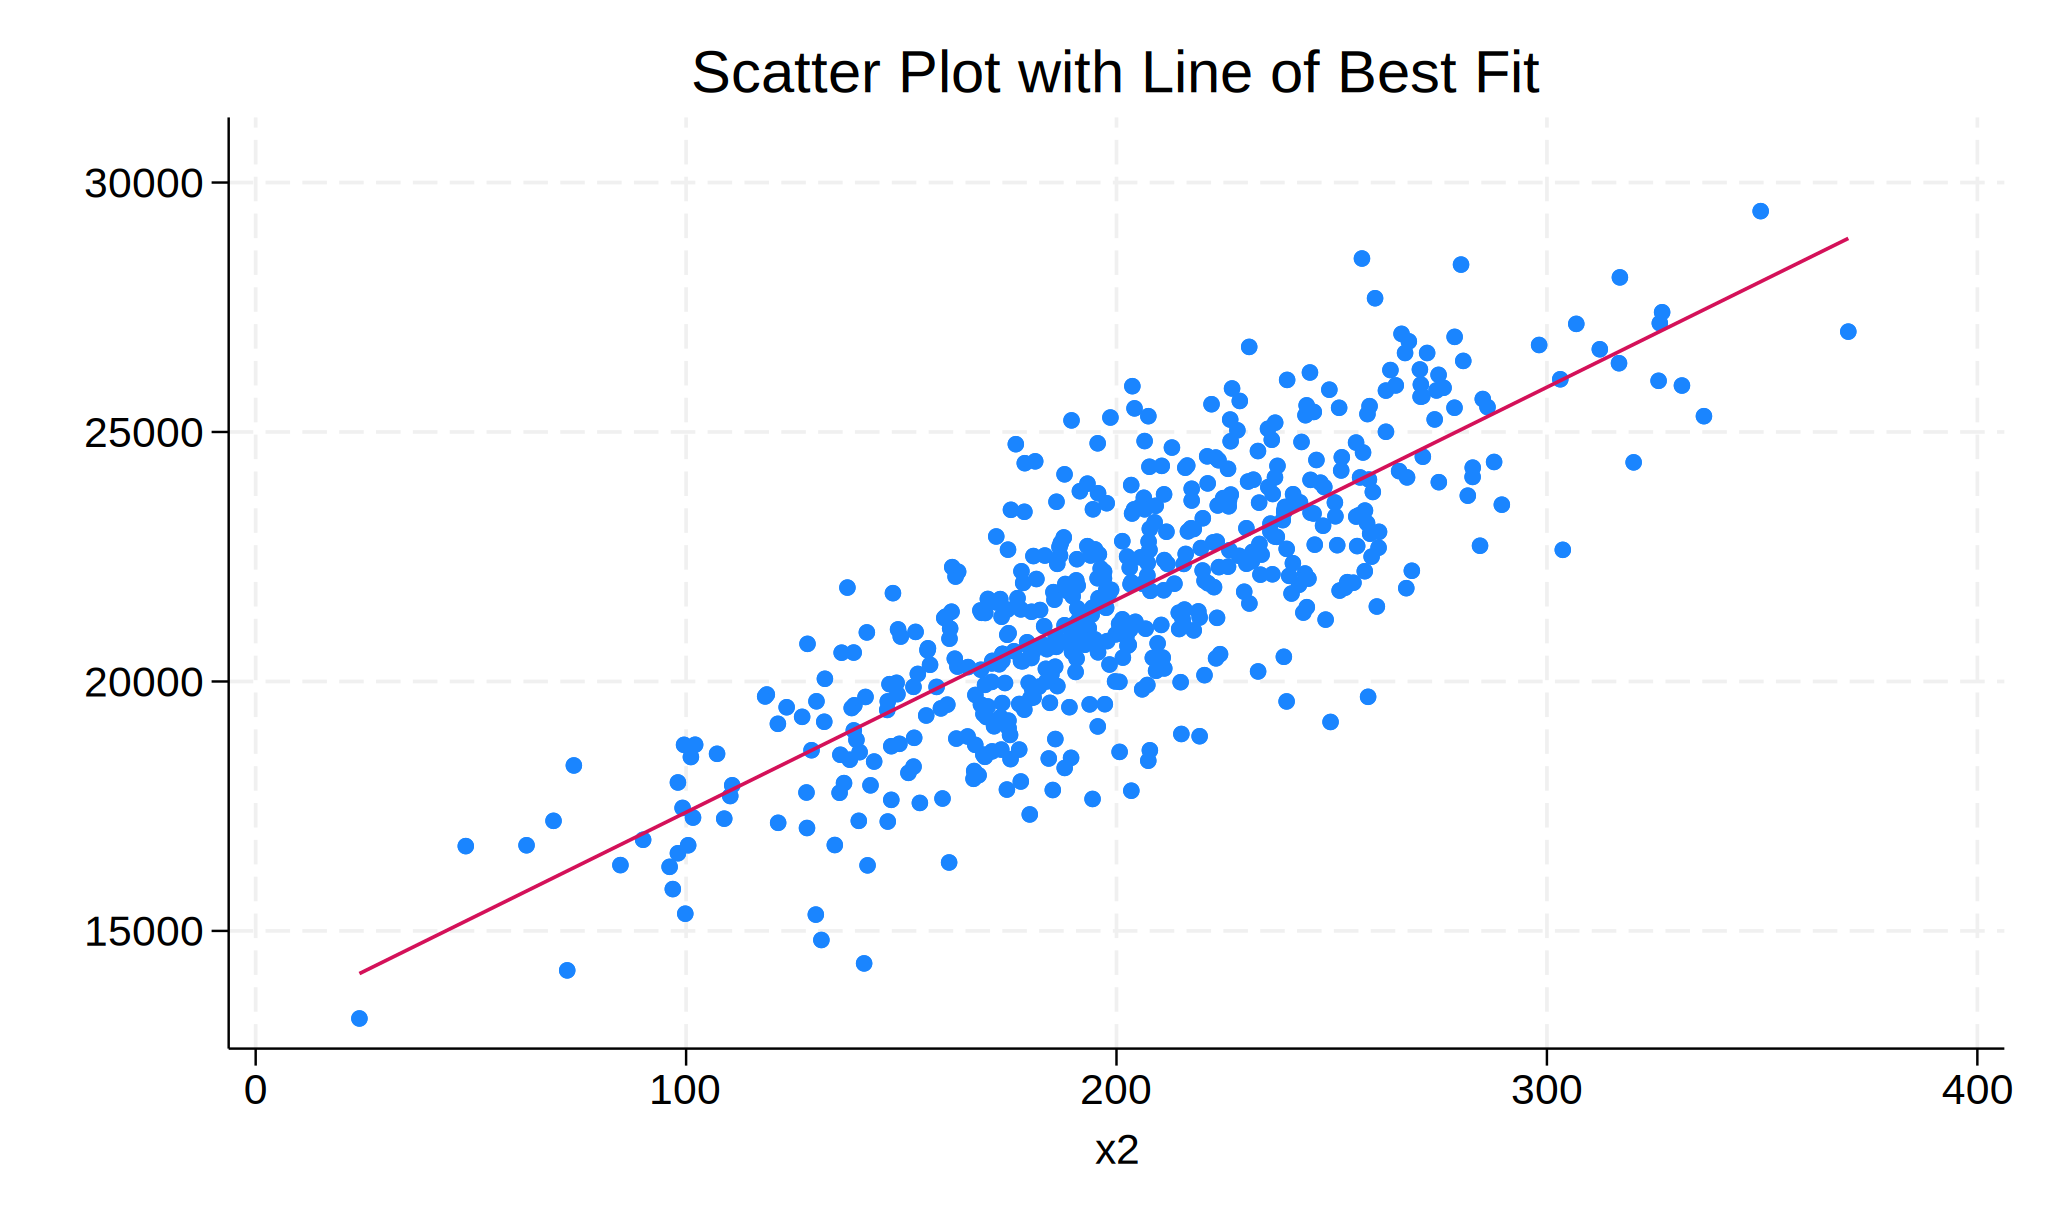

In [35]:
%%stata

clear

* Set seed
set seed 123

* Set number of observations
set obs 1000

* Generate metric independent variable #1
drawnorm x1, n(1000) means(40) sds(12)

* Generate metric independent variable #2
drawnorm x2, n(1000) means(200) sds(50)

* Generate metric independent variable #3
drawnorm x3, n(1000) means(150) sds(5)

* Generate metric dependent variable with large coefficients
gen y = 30*x1 + 40*x2 + 50*x3 + rnormal(5000, 1500)

* Generate MCAR 
gen rmcar = rbinomial(1, 0.5)  // MCAR: 50% chance of missingness (binary random)
replace x2 = . if rmcar == 0  // Set x to missing where rmcar == 0

regress y x1 x2 x3

etable, append

twoway (scatter y x2) (lfit y x2), title("Scatter Plot with Line of Best Fit") legend(off)



In [36]:
%%R

# Set seed for reproducibility
set.seed(123)

# Generate metric independent variables
x1 <- rnorm(1000, mean = 40, sd = 12)
x2 <- rnorm(1000, mean = 200, sd = 50)
x3 <- rnorm(1000, mean = 150, sd = 5)

# Generate metric dependent variable
y <- 30*x1 + 40*x2 + 50*x3 + rnorm(1000, mean = 5000, sd = 1500)

# Introduce 50% Missing Completely at Random (MCAR) in x2
rmcar <- rbinom(1000, 1, 0.5)  # Binary indicator: 50% missingness
x2[rmcar == 0] <- NA        # Set x2 to NA for half the observations

# Create data frame
data <- data.frame(y, x1, x2, x3)

# Run OLS regression (handling missing data with listwise deletion by default)
ols_model <- lm(y ~ x1 + x2 + x3, data = data)

# Display regression results
summary(ols_model)



Call:
lm(formula = y ~ x1 + x2 + x3, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4464.9 -1057.0   -31.6  1042.2  4294.4 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  386.332   2177.578   0.177    0.859    
x1            29.499      5.908   4.993 8.28e-07 ***
x2            40.483      1.364  29.671  < 2e-16 ***
x3            80.047     14.416   5.553 4.62e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1548 on 489 degrees of freedom
  (507 observations deleted due to missingness)
Multiple R-squared:  0.6697,	Adjusted R-squared:  0.6677 
F-statistic: 330.5 on 3 and 489 DF,  p-value: < 2.2e-16



In [37]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Set seed for reproducibility
np.random.seed(123)

# Set number of observations
n = 1000

# Generate independent variables
x1 = np.random.normal(loc=40, scale=12, size=n)
x2 = np.random.normal(loc=200, scale=50, size=n)
x3 = np.random.normal(loc=150, scale=5, size=n)

# Generate dependent variable
y = 30*x1 + 40*x2 + 50*x3 + np.random.normal(loc=5000, scale=1500, size=n)

# Introduce 50% Missing Completely at Random (MCAR) in x2
rmcar = np.random.binomial(1, 0.5, size=n)  # Binary indicator: 50% missingness
x2[rmcar == 0] = np.nan  # Set x2 to NaN for half the observations

# Create DataFrame
data = pd.DataFrame({'y': y, 'x1': x1, 'x2': x2, 'x3': x3})

# Drop rows with missing values (listwise deletion) and run OLS regression
data_complete = data.dropna()  # Remove rows with NaN
X = data_complete[['x1', 'x2', 'x3']]
X = sm.add_constant(X)  # Add intercept
y = data_complete['y']

# Fit OLS model
model = sm.OLS(y, X).fit()

# Display results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     295.0
Date:                Sun, 06 Apr 2025   Prob (F-statistic):          1.19e-111
Time:                        13:35:55   Log-Likelihood:                -4541.7
No. Observations:                 522   AIC:                             9091.
Df Residuals:                     518   BIC:                             9108.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4652.1226   2050.412      2.269      0.0

Now we move on to a MAR model. First starting with Stata.


. 
. clear

. 
. * Set seed
. set seed 123

. 
. * Set number of observations
. set obs 1000
Number of observations (_N) was 0, now 1,000.

. 
. * Generate metric independent variable #1
. drawnorm x1, n(1000) means(40) sds(12)

. 
. * Generate metric independent variable #2
. drawnorm x2, n(1000) means(200) sds(50)

. 
. * Generate metric independent variable #3
. drawnorm x3, n(1000) means(150) sds(5)

. 
. * Generate metric dependent variable with large coefficients
. gen y = 30*x1 + 40*x2 + 50*x3 + rnormal(5000, 1500)

. 
. * Generate MAR
. gen prob_mar = logistic(y-21791)

. gen rmar = 0 if prob_mar==0
(500 missing values generated)

. replace x2 = . if rmar == 0  // Set x to missing where rmar == 0
(500 real changes made, 500 to missing)

. regress y x1 x2 x3

      Source |       SS           df       MS      Number of obs   =       500
-------------+----------------------------------   F(3, 496)       =    122.89
       Model |   552925039         3   184308346   Prob > F     

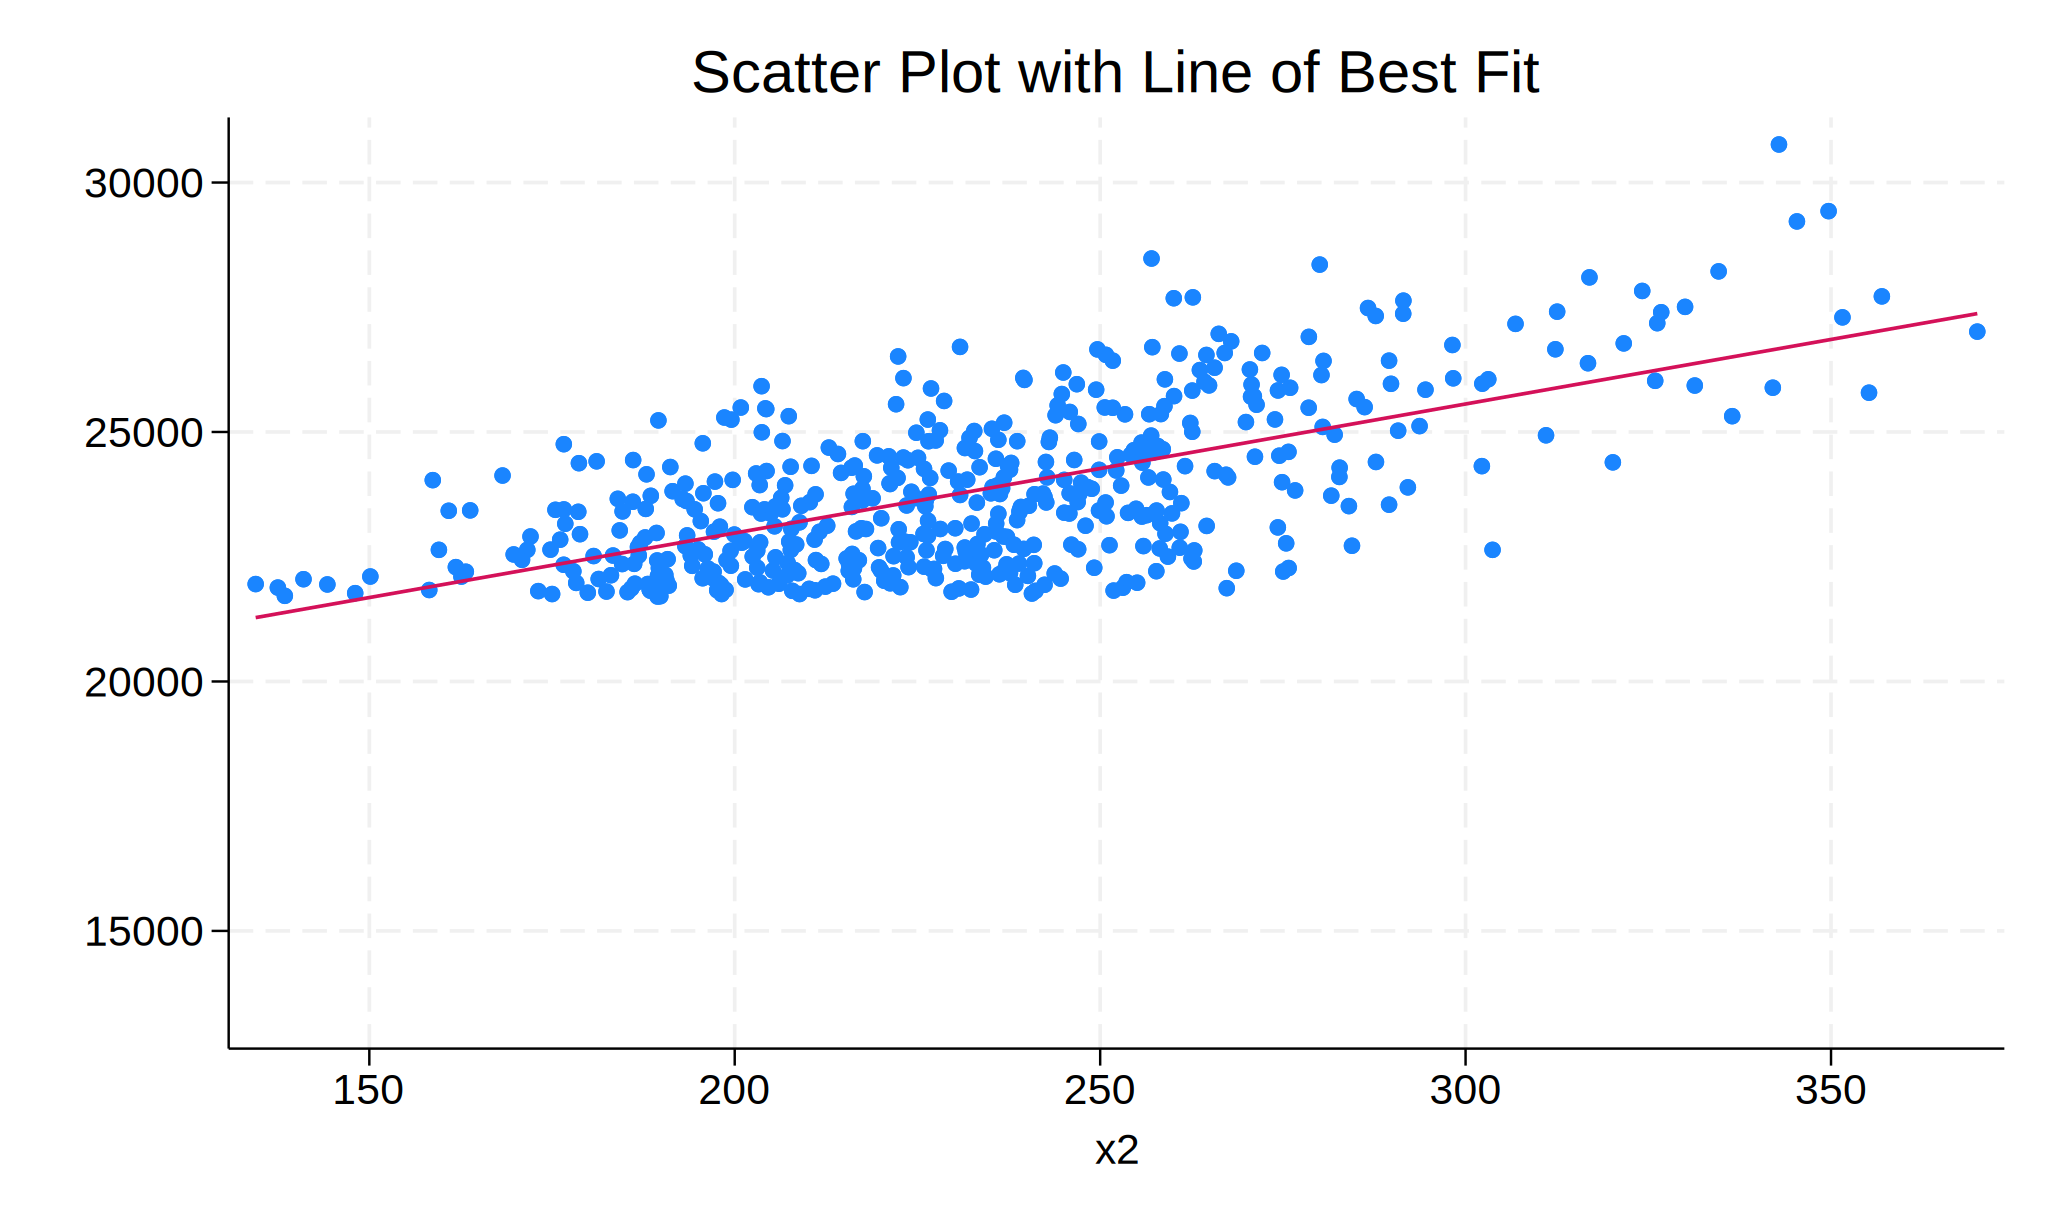

In [39]:
%%stata

clear

* Set seed
set seed 123

* Set number of observations
set obs 1000

* Generate metric independent variable #1
drawnorm x1, n(1000) means(40) sds(12)

* Generate metric independent variable #2
drawnorm x2, n(1000) means(200) sds(50)

* Generate metric independent variable #3
drawnorm x3, n(1000) means(150) sds(5)

* Generate metric dependent variable with large coefficients
gen y = 30*x1 + 40*x2 + 50*x3 + rnormal(5000, 1500)

* Generate MAR
gen prob_mar = logistic(y-21791)
gen rmar = 0 if prob_mar==0
replace x2 = . if rmar == 0  // Set x to missing where rmar == 0
regress y x1 x2 x3

etable, append

twoway (scatter y x2) (lfit y x2), title("Scatter Plot with Line of Best Fit") legend(off)


In [40]:
%%R

# Load necessary library
set.seed(123)  # Ensure reproducibility

# Generate metric independent variables
x1 <- rnorm(1000, mean = 40, sd = 12)
x2 <- rnorm(1000, mean = 200, sd = 50)
x3 <- rnorm(1000, mean = 150, sd = 5)

# Generate metric dependent variable
y <- 30*x1 + 40*x2 + 50*x3 + rnorm(1000, mean = 5000, sd = 1500)

# Generate MAR (Missing At Random) pattern
prob_mar <- 1 / (1 + exp(-(y - 21791)))  # Logistic function
rmar <- rbinom(1000, 1, prob_mar)  # Generate missing indicator based on probability
x2[rmar == 0] <- NA  # Set x2 to NA for MAR missingness

# Create data frame
data <- data.frame(y, x1, x2, x3)

# Run OLS regression (listwise deletion by default)
ols_model <- lm(y ~ x1 + x2 + x3, data = data, na.action = na.omit)

# Display regression results
summary(ols_model)



Call:
lm(formula = y ~ x1 + x2 + x3, data = data, na.action = na.omit)

Residuals:
    Min      1Q  Median      3Q     Max 
-2876.0  -828.4   -78.3   670.2  3761.0 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12209.232   1598.736   7.637 1.13e-13 ***
x1             19.693      4.588   4.292 2.12e-05 ***
x2             24.731      1.351  18.300  < 2e-16 ***
x3             33.021     10.191   3.240  0.00127 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1161 on 504 degrees of freedom
  (492 observations deleted due to missingness)
Multiple R-squared:  0.4173,	Adjusted R-squared:  0.4138 
F-statistic: 120.3 on 3 and 504 DF,  p-value: < 2.2e-16



In [41]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Set seed for reproducibility
np.random.seed(123)

# Set number of observations
n = 1000

# Generate independent variables
x1 = np.random.normal(40, 12, n)
x2 = np.random.normal(200, 50, n)
x3 = np.random.normal(150, 5, n)

# Generate dependent variable
y = 3*x1 + 4*x2 + 4*x3 + np.random.normal(500, 150, n)

# Generate MAR (Missing At Random) for x2

# Logistic function with scaled y values
prob_mar = 1 / (1 + np.exp(y-2050))  # Apply logistic function
rmar = np.random.binomial(1, prob_mar)  # Generate MAR indicator
x2[rmar == 0] = np.nan  # Set x2 to missing

# Create DataFrame
data = pd.DataFrame({'y': y, 'x1': x1, 'x2': x2, 'x3': x3})

# Run OLS regression (listwise deletion by default)
data_clean = data.dropna()  # Remove rows with missing values
X = sm.add_constant(data_clean[['x1', 'x2', 'x3']])  # Add intercept
model = sm.OLS(data_clean['y'], X).fit()

# Display regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     116.1
Date:                Sun, 06 Apr 2025   Prob (F-statistic):           9.95e-58
Time:                        13:35:55   Log-Likelihood:                -3262.9
No. Observations:                 531   AIC:                             6534.
Df Residuals:                     527   BIC:                             6551.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        872.2379    153.985      5.664      0.0

Now we have our baseline MAR model for each software, now we can focus on implementing potential handling missing data solutions. Starting with Stata and Single mean imputation.


. 
. clear

. 
. * Set seed
. set seed 123

. 
. * Set number of observations
. set obs 1000
Number of observations (_N) was 0, now 1,000.

. 
. * Generate metric independent variable #1
. drawnorm x1, n(1000) means(40) sds(12)

. 
. * Generate metric independent variable #2
. drawnorm x2, n(1000) means(200) sds(50)

. 
. * Generate metric independent variable #3
. drawnorm x3, n(1000) means(150) sds(5)

. 
. * Generate metric dependent variable with large coefficients
. gen y = 30*x1 + 40*x2 + 50*x3 + rnormal(5000, 1500)

. 
. * Generate MAR
. gen prob_mar = logistic(y-21791)

. gen rmar = 0 if prob_mar==0
(500 missing values generated)

. replace x2 = . if rmar == 0  // Set x to missing where rmar == 0
(500 real changes made, 500 to missing)

. 
. summarize x2, meanonly

. replace x2 = r(mean) if missing(x2)
(500 real changes made)

. 
. regress y x1 x2 x3

      Source |       SS           df       MS      Number of obs   =     1,000
-------------+----------------------------------

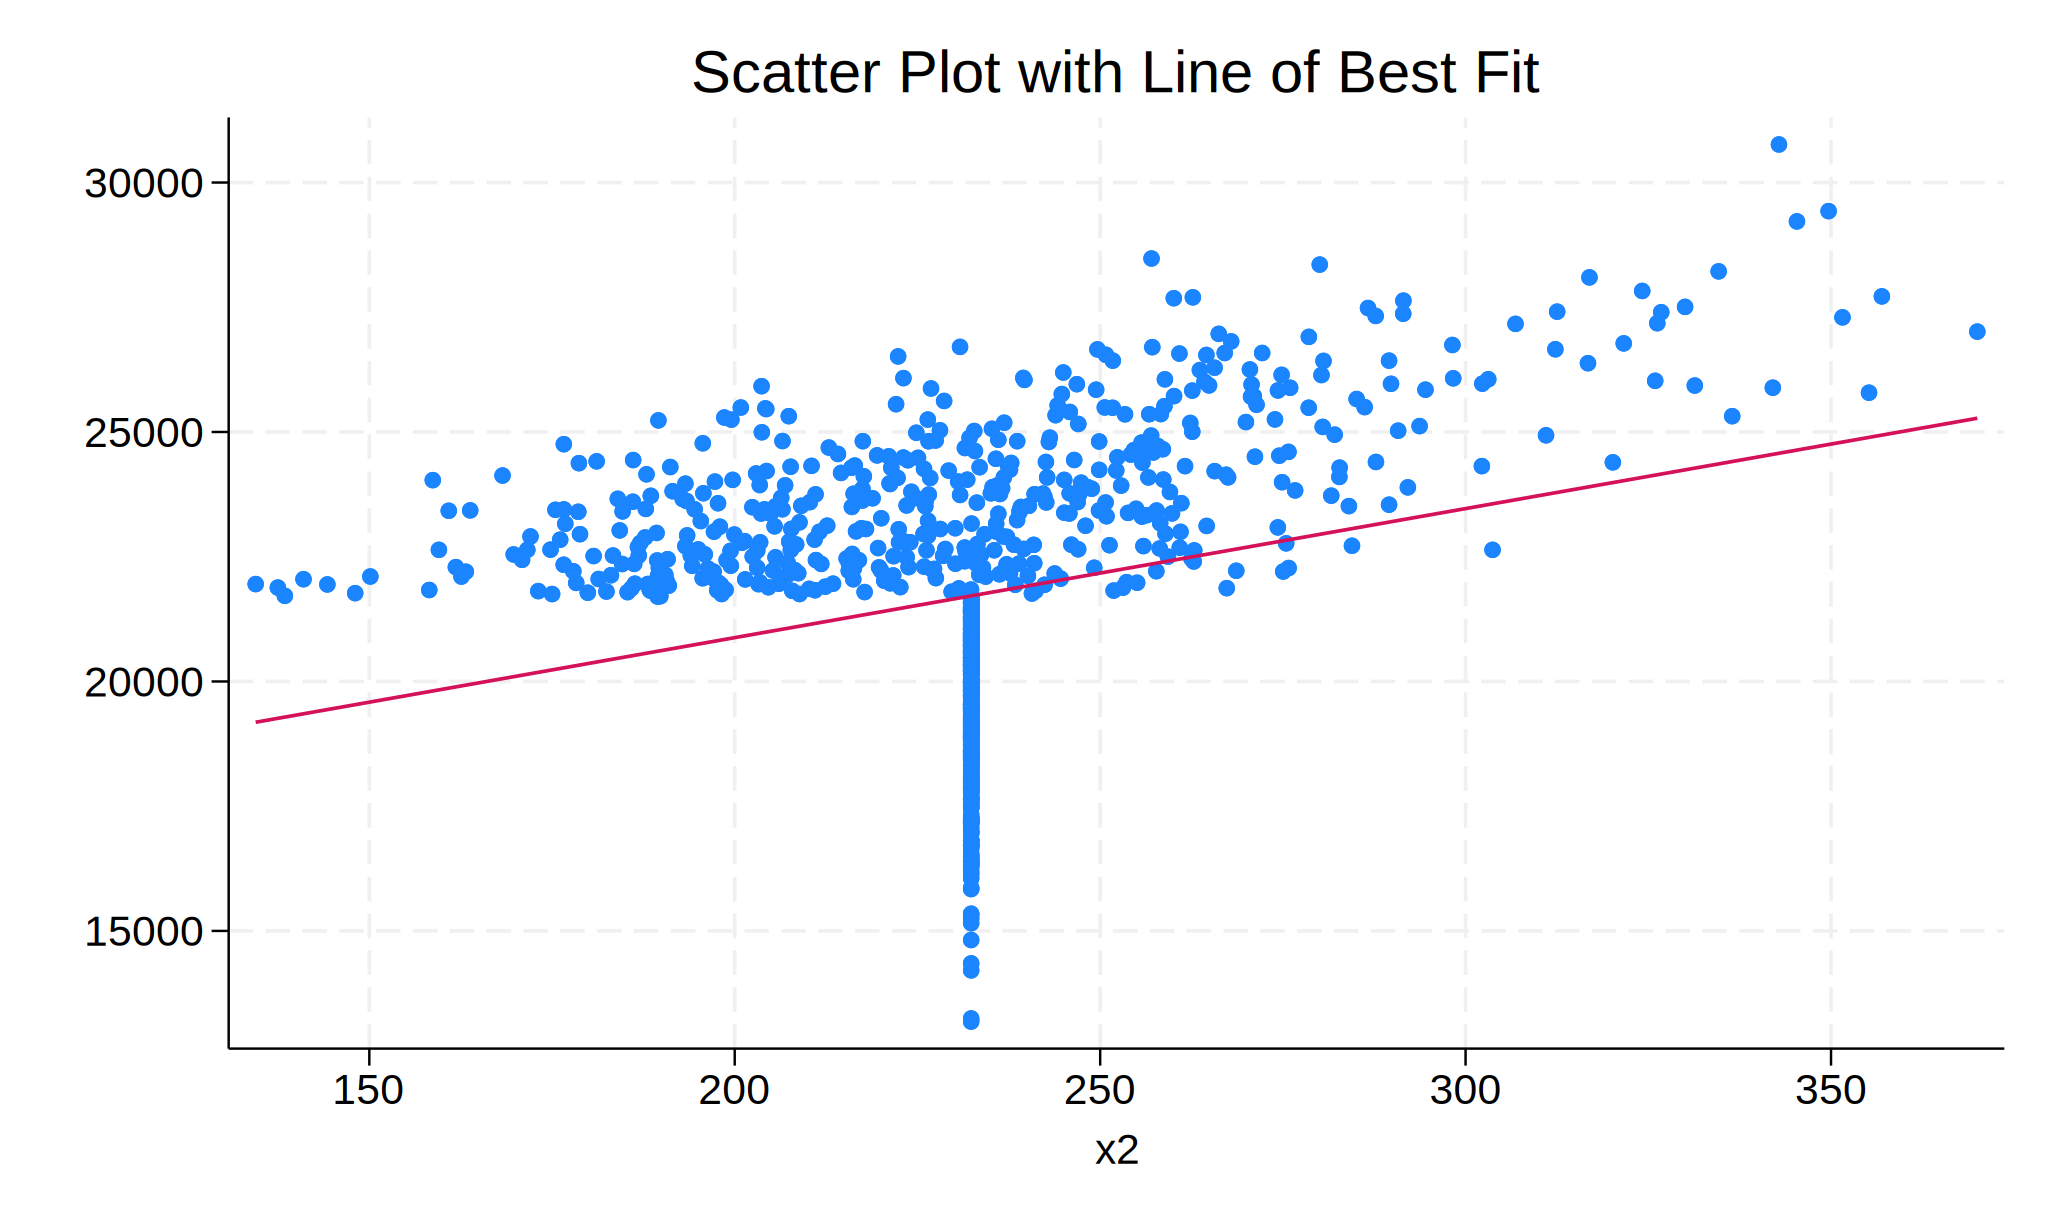

In [43]:
%%stata

clear

* Set seed
set seed 123

* Set number of observations
set obs 1000

* Generate metric independent variable #1
drawnorm x1, n(1000) means(40) sds(12)

* Generate metric independent variable #2
drawnorm x2, n(1000) means(200) sds(50)

* Generate metric independent variable #3
drawnorm x3, n(1000) means(150) sds(5)

* Generate metric dependent variable with large coefficients
gen y = 30*x1 + 40*x2 + 50*x3 + rnormal(5000, 1500)

* Generate MAR
gen prob_mar = logistic(y-21791)
gen rmar = 0 if prob_mar==0
replace x2 = . if rmar == 0  // Set x to missing where rmar == 0

summarize x2, meanonly
replace x2 = r(mean) if missing(x2)

regress y x1 x2 x3

etable, append

twoway (scatter y x2) (lfit y x2), title("Scatter Plot with Line of Best Fit") legend(off)

In [44]:
%%R

# Set seed for reproducibility
set.seed(123)

# Generate metric independent variables
x1 <- rnorm(1000, mean = 40, sd = 12)
x2 <- rnorm(1000, mean = 200, sd = 50)
x3 <- rnorm(1000, mean = 150, sd = 5)

# Generate metric dependent variable
y <- 30*x1 + 40*x2 + 50*x3 + rnorm(1000, mean = 5000, sd = 1500)

# Generate MAR (Missing At Random) for x2 using logistic function
prob_mar <- 1 / (1 + exp(-(y - 21791)))  # Logistic function
rmar <- rbinom(1000, 1, prob_mar)  # Generate MAR indicator
x2[rmar == 0] <- NA  # Set x2 to missing where rmar == 0

# Display the summary statistics for x2 (mean only)
mean_x2 <- mean(x2, na.rm = TRUE)

# Replace missing values of x2 with the mean of x2
x2[is.na(x2)] <- mean_x2

# Create a data frame with the variables
data <- data.frame(y, x1, x2, x3)

# Run OLS regression
model <- lm(y ~ x1 + x2 + x3, data = data)

# Display the regression results
summary(model)



Call:
lm(formula = y ~ x1 + x2 + x3, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-7956.9 -1644.3   163.7  1915.5  5959.5 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1910.091   2459.762   0.777    0.438    
x1            43.837      6.384   6.866 1.16e-11 ***
x2            24.910      2.794   8.915  < 2e-16 ***
x3            81.888     15.540   5.270 1.68e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2401 on 996 degrees of freedom
Multiple R-squared:  0.1319,	Adjusted R-squared:  0.1293 
F-statistic: 50.46 on 3 and 996 DF,  p-value: < 2.2e-16



In [45]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Set seed for reproducibility
np.random.seed(123)

# Set number of observations
n = 1000

# Generate independent variables
x1 = np.random.normal(40, 12, n)
x2 = np.random.normal(200, 50, n)
x3 = np.random.normal(150, 5, n)

# Generate dependent variable
y = 3*x1 + 4*x2 + 4*x3 + np.random.normal(500, 150, n)

# Generate MAR (Missing At Random) for x2

# Logistic function with scaled y values
prob_mar = 1 / (1 + np.exp(y-2050))  # Apply logistic function
rmar = np.random.binomial(1, prob_mar)  # Generate MAR indicator
x2[rmar == 0] = np.nan  # Set x2 to missing

# Replace missing values in x2 with the mean of x2
x2[np.isnan(x2)] = np.nanmean(x2)

# Create DataFrame
data = pd.DataFrame({'y': y, 'x1': x1, 'x2': x2, 'x3': x3})

# Run OLS regression (listwise deletion by default)
X = sm.add_constant(data[['x1', 'x2', 'x3']])  # Add intercept
model = sm.OLS(data['y'], X).fit()

# Display regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     34.32
Date:                Sun, 06 Apr 2025   Prob (F-statistic):           4.11e-21
Time:                        13:35:55   Log-Likelihood:                -6848.0
No. Observations:                1000   AIC:                         1.370e+04
Df Residuals:                     996   BIC:                         1.372e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        958.4029    228.310      4.198      0.0

Now we move on to FIML approaches with Stata first.


. 
. clear

. 
. * Set seed
. set seed 123

. 
. * Set number of observations
. set obs 1000
Number of observations (_N) was 0, now 1,000.

. 
. * Generate metric independent variable #1
. drawnorm x1, n(1000) means(40) sds(12)

. 
. * Generate metric independent variable #2
. drawnorm x2, n(1000) means(200) sds(50)

. 
. * Generate metric independent variable #3
. drawnorm x3, n(1000) means(150) sds(5)

. 
. * Generate metric dependent variable with large coefficients
. gen y = 30*x1 + 40*x2 + 50*x3 + rnormal(5000, 1500)

. 
. * Generate MAR
. gen prob_mar = logistic(y-21791)

. gen rmar = 0 if prob_mar==0
(500 missing values generated)

. replace x2 = . if rmar == 0  // Set x to missing where rmar == 0
(500 real changes made, 500 to missing)

.     
. * Model estimation
. sem (y <- x1 x2 x3), method(mlmv)
note: Missing values found in observed exogenous variables. Using the
      noxconditional behavior. Specify the forcexconditional option to
      override this behavior.
Endogenou

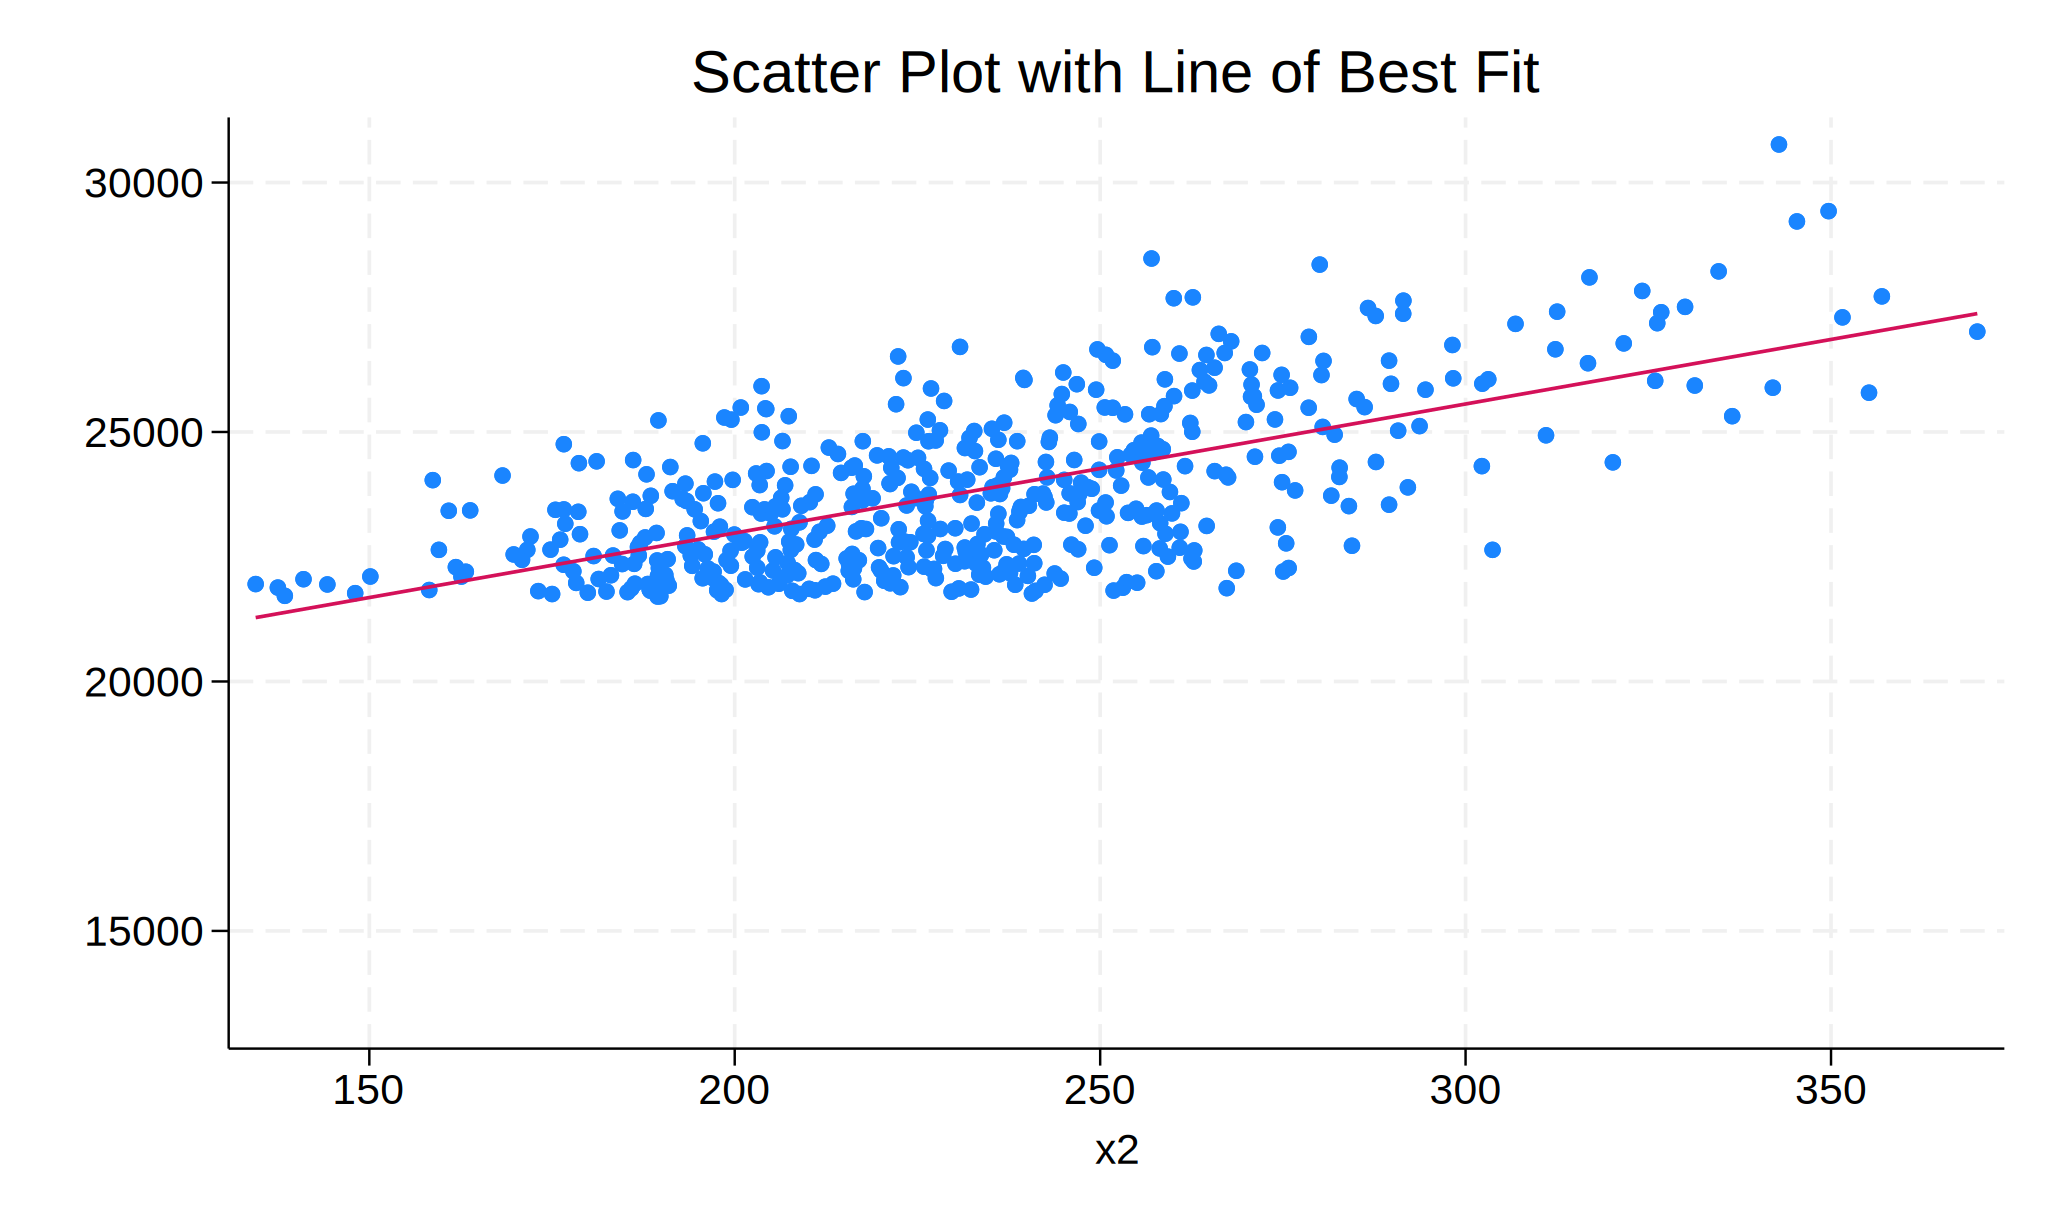

In [47]:
%%stata

clear

* Set seed
set seed 123

* Set number of observations
set obs 1000

* Generate metric independent variable #1
drawnorm x1, n(1000) means(40) sds(12)

* Generate metric independent variable #2
drawnorm x2, n(1000) means(200) sds(50)

* Generate metric independent variable #3
drawnorm x3, n(1000) means(150) sds(5)

* Generate metric dependent variable with large coefficients
gen y = 30*x1 + 40*x2 + 50*x3 + rnormal(5000, 1500)

* Generate MAR
gen prob_mar = logistic(y-21791)
gen rmar = 0 if prob_mar==0
replace x2 = . if rmar == 0  // Set x to missing where rmar == 0
    
* Model estimation
sem (y <- x1 x2 x3), method(mlmv)

etable, append

twoway (scatter y x2) (lfit y x2), title("Scatter Plot with Line of Best Fit") legend(off)

In [48]:
%%R

# Set seed for reproducibility
set.seed(123)

# Generate metric independent variables
x1 <- rnorm(1000, mean = 40, sd = 12)
x2 <- rnorm(1000, mean = 200, sd = 50)
x3 <- rnorm(1000, mean = 150, sd = 5)

# Generate metric dependent variable
y <- 30*x1 + 40*x2 + 50*x3 + rnorm(1000, mean = 5000, sd = 1500)

# Generate MAR (Missing At Random) for x2
prob_mar <- 1 / (1 + exp(-(y - 21791)))  # Logistic function
rmar <- ifelse(prob_mar == 0, 0, 1)  # 0 if prob_mar is 0, 1 otherwise
x2[rmar == 0] <- NA  # Set x2 to missing where rmar == 0

# Load 'lavaan' package for SEM (Structural Equation Modeling)
library(lavaan)

# Define the model formula (SEM model)
model <- '
  y ~ x1 + x2 + x3  # y as a function of x1, x2, and x3
'

# Fit the model using the 'lavaan' package
fit <- sem(model, data = data.frame(y, x1, x2, x3))

# Display the model summary
summary(fit)


lavaan 0.6-18 ended normally after 1 iteration

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                         4

                                                  Used       Total
  Number of observations                           606        1000

Model Test User Model:
                                                      
  Test statistic                                 0.000
  Degrees of freedom                                 0

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Regressions:
                   Estimate     Std.Err   z-value  P(>|z|)
  y ~                                                     
    x1                  19.799     4.270    4.637    0.000
    x2                  27.159     1.260   21.549    0.000
    x3                  4

In addition: Warning message:
lavaan->lav_data_full():  
   some observed variances are larger than 1000000 use varTable(fit) to 
   investigate 


To my knowledge, there is no viable FIML estimation practice within Python. This makes it impossible to use FIML as a handling missing data technique in Python and as such you have to use alternative methods such as Imputation. This will now be demonstrated, again starting with Stata. For the purposes of this simulation, as all variables are continuous a MVN Multiple Imputation approach can be used, though MICE allows for variables of different types to be imputed.

In [50]:
%%stata

clear

* Set seed
set seed 123

* Set number of observations
set obs 1000

* Generate metric independent variable #1
drawnorm x1, n(1000) means(40) sds(12)

* Generate metric independent variable #2
drawnorm x2, n(1000) means(200) sds(50)

* Generate metric independent variable #3
drawnorm x3, n(1000) means(150) sds(5)

* Generate metric dependent variable with large coefficients
gen y = 30*x1 + 40*x2 + 50*x3 + rnormal(5000, 1500)

* Generate MAR
gen prob_mar = logistic(y-21791)
gen rmar = 0 if prob_mar==0
replace x2 = . if rmar == 0  // Set x to missing where rmar == 0
    
mi set wide

mi register imputed y x1 x2 x3

tab _mi_miss


mi impute chained ///
///
(regress) y x1 x2 x3 ///
, rseed(12345) dots force add(10) burnin(10) 


mi estimate, post dots: regress y x1 x2 x3

etable, append


. 
. clear

. 
. * Set seed
. set seed 123

. 
. * Set number of observations
. set obs 1000
Number of observations (_N) was 0, now 1,000.

. 
. * Generate metric independent variable #1
. drawnorm x1, n(1000) means(40) sds(12)

. 
. * Generate metric independent variable #2
. drawnorm x2, n(1000) means(200) sds(50)

. 
. * Generate metric independent variable #3
. drawnorm x3, n(1000) means(150) sds(5)

. 
. * Generate metric dependent variable with large coefficients
. gen y = 30*x1 + 40*x2 + 50*x3 + rnormal(5000, 1500)

. 
. * Generate MAR
. gen prob_mar = logistic(y-21791)

. gen rmar = 0 if prob_mar==0
(500 missing values generated)

. replace x2 = . if rmar == 0  // Set x to missing where rmar == 0
(500 real changes made, 500 to missing)

.     
. mi set wide

. 
. mi register imputed y x1 x2 x3

. 
. tab _mi_miss

 Incomplete |
observation |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |        500       50.00       50.00
     

Now R code.

In [52]:
%%R
# Install and load the `mice` package for multiple imputation (if not already installed)
if (!require(mice)) install.packages("mice", dependencies = TRUE)
library(mice)

# Set seed for reproducibility
set.seed(123)

# Generate metric independent variables
x1 <- rnorm(1000, mean = 40, sd = 12)
x2 <- rnorm(1000, mean = 200, sd = 50)
x3 <- rnorm(1000, mean = 150, sd = 5)

# Generate metric dependent variable
y <- 30*x1 + 40*x2 + 50*x3 + rnorm(1000, mean = 5000, sd = 1500)

# Generate MAR (Missing At Random) for x2
prob_mar <- 1 / (1 + exp(-(y - 21791)))  # Logistic function
rmar <- ifelse(prob_mar == 0, 0, 1)  # 0 if prob_mar is 0, 1 otherwise
x2[rmar == 0] <- NA  # Set x2 to missing where rmar == 0

# Prepare the data for multiple imputation
data <- data.frame(y, x1, x2, x3)

# Perform multiple imputation using chained equations (MICE)
imp <- mice(data, m = 10, method = "pmm", seed = 12345)

# Perform regression after imputation
fit <- with(imp, lm(y ~ x1 + x2 + x3))

# Combine the results of the regression and display the estimates
pooled_results <- pool(fit)
summary(pooled_results)



 iter imp variable
  1   1  x2
  1   2  x2
  1   3  x2
  1   4  x2
  1   5  x2
  1   6  x2
  1   7  x2
  1   8  x2
  1   9  x2
  1   10  x2
  2   1  x2
  2   2  x2
  2   3  x2
  2   4  x2
  2   5  x2
  2   6  x2
  2   7  x2
  2   8  x2
  2   9  x2
  2   10  x2
  3   1  x2
  3   2  x2
  3   3  x2
  3   4  x2
  3   5  x2
  3   6  x2
  3   7  x2
  3   8  x2
  3   9  x2
  3   10  x2
  4   1  x2
  4   2  x2
  4   3  x2
  4   4  x2
  4   5  x2
  4   6  x2
  4   7  x2
  4   8  x2
  4   9  x2
  4   10  x2
  5   1  x2
  5   2  x2
  5   3  x2
  5   4  x2
  5   5  x2
  5   6  x2
  5   7  x2
  5   8  x2
  5   9  x2
  5   10  x2
         term   estimate   std.error statistic       df      p.value
1 (Intercept) 2184.92911 1901.113549  1.149289 415.6189 2.510977e-01
2          x1   30.19575    5.472728  5.517495 165.8509 1.299693e-07
3          x2   39.85730    1.632656 24.412548  80.6700 5.233432e-39
4          x3   67.14173   12.700619  5.286493 308.6763 2.363451e-07


Loading required package: mice

Attaching package: ‘mice’

The following object is masked from ‘package:stats’:

    filter

The following objects are masked from ‘package:base’:

    cbind, rbind



And finally, python. (not currently working)